In [1]:
from syntactic_similarity import syntactic_similarity_driver
from structural_similarity import structural_similarity_driver

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

# generating the scores csv

In [4]:


def generate_scores_csv(df,path):
    firstIndex = path.find("n_")
    finalIndex = path.find("_",firstIndex+2)
    n = int(path[firstIndex+2:finalIndex])

    cols = [
        'task_id', 'prompt', 'sequence_similarity','edit_distance_score',
        'jaccard_similarity','cosine_similarity_score','sorensen_dice_coefficient',
        'hamming_distance_score', 'longest_common_subsequence', 'UnifiedDiff','TreeDiff'
    ] + [f'pass_rate_{i}' for i in range(n+1)]


    final = pd.DataFrame(columns = cols)

    #iterating over the rows of the dataframe
    for index, row in df.iterrows():
        #getting the reference and the generated text
        generated_codes = list(row[[f'code_{i}' for i in range(n+1)]])
            
        #computing the structural similarity
        _, structural_similarity_scores_dict,_ = structural_similarity_driver(generated_codes)
        
        #computing the syntactic similarity
        _, syntactic_similarity_scores_dict,_ = syntactic_similarity_driver(generated_codes)
        
        #dict to store the data
        dict = {'task_id': row['task_id'], 'prompt': row['prompt']}

        for i in range(n+1):
            dict['pass_rate_'+str(i)] = row['pass_rate_'+str(i)]
            
        #appending the syntactic similarity scores to the dict
        for key in syntactic_similarity_scores_dict.keys():
            dict[key] = syntactic_similarity_scores_dict[key]

        #appending the structural similarity scores to the dict
        for key in structural_similarity_scores_dict.keys():
            dict[key] = structural_similarity_scores_dict[key]

        temp = pd.DataFrame(dict, index=[0])

        #concatenating the dataframes
        final = pd.concat([final, temp], ignore_index=True)
    
    path = path.replace(".csv","_sim_score.csv")
    path = path.replace("RESULTS","RESULTS/final scores")
    final.to_csv(path, index=False)

# reading the files

In [5]:
# Get a list of all CSV files in the directory
csv_files = glob.glob('./RESULTS/*.csv')

# Loop over the files and read them into pandas DataFrames
for file in csv_files:
    df = pd.read_csv(file)
    generate_scores_csv(df,file)
    print("Scores generated for ", file)

print("Scores generated successfully")

/tmp/ipykernel_35193/1187370557.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, temp], ignore_index=True)


Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-4-turbo-preview_n_5_tempr_0_temps_1_trial_1.csv


/tmp/ipykernel_35193/1187370557.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, temp], ignore_index=True)


Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_0_temps_1.5_trial_1.csv


/tmp/ipykernel_35193/1187370557.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, temp], ignore_index=True)


Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_1_temps_1_trial_1.csv


/tmp/ipykernel_35193/1187370557.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, temp], ignore_index=True)


Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_0_temps_1_trial_1.csv


/tmp/ipykernel_35193/1187370557.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, temp], ignore_index=True)


Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_3_tempr_0_temps_1_trial_1.csv


/tmp/ipykernel_35193/1187370557.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, temp], ignore_index=True)


Scores generated for  ./RESULTS/dataset_HumanEval_model_gpt-3.5-turbo_n_10_tempr_0_temps_1_trial_1.csv
Scores generated successfully


# visualizations

In [65]:
#read the csv file dataset_HumanEval_model_gpt-4-turbo-preview_n_5_tempr_0_temps_1_trial_1_sim_score.csv
df = pd.read_csv("RESULTS/final scores/dataset_HumanEval_model_gpt-3.5-turbo_n_5_tempr_0_temps_1.5_trial_1_sim_score.csv")
#add column to avg the pass rate
df['avg_pass_rate'] = df[[f'pass_rate_{i}' for i in range(6)]].mean(axis=1)
#sort by avg pass rate
df = df.sort_values(by='avg_pass_rate',ascending=True)

df

,task_id,prompt,sequence_similarity,edit_distance_score,jaccard_similarity,cosine_similarity_score,sorensen_dice_coefficient,hamming_distance_score,longest_common_subsequence,UnifiedDiff,TreeDiff,pass_rate_0,pass_rate_1,pass_rate_2,pass_rate_3,pass_rate_4,pass_rate_5,avg_pass_rate
129,HumanEval/129,"\ndef minPath(grid, k):\n """"""\n Given a ...",0.713669,0.403474,0.469424,0.357581,0.985983,0.233008,0.048208,0.312456,0.500418,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,HumanEval/113,"\ndef odd_count(lst):\n """"""Given a list of ...",0.774511,0.416019,0.570671,0.486906,0.959756,0.231894,0.190192,0.330612,0.473545,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,HumanEval/41,"\n\ndef car_race_collision(n: int):\n """"""\n...",0.803393,0.459592,0.573409,0.487456,0.945846,0.386413,0.430620,0.517857,0.462185,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,HumanEval/39,"\n\ndef prime_fib(n: int):\n """"""\n prime...",0.761394,0.518395,0.582943,0.476994,0.980091,0.195877,0.136779,0.358314,0.395773,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,HumanEval/38,"\n\ndef encode_cyclic(s: str):\n """"""\n r...",0.849286,0.628937,0.676244,0.744183,0.980140,0.153342,0.427060,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,HumanEval/34,"\n\ndef unique(l: list):\n """"""Return sorted...",0.863860,0.617820,0.711436,0.852398,0.937254,0.417649,0.395655,0.651786,0.638095,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,0.868934,0.660599,0.723683,0.775090,0.982213,0.462496,0.417799,0.587302,0.669643,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,0.809829,0.494508,0.542632,0.667058,0.977123,0.272552,0.206266,0.714286,0.714286,100.0,100.0,100.0,100.0,100.0,100.0,100.0
133,HumanEval/133,"\n\ndef sum_squares(lst):\n """"""You are give...",0.898528,0.760139,0.858103,0.852893,0.990661,0.656279,0.628444,0.624060,0.630252,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [66]:
scores_columns = ['sequence_similarity','edit_distance_score','jaccard_similarity','cosine_similarity_score','sorensen_dice_coefficient','hamming_distance_score','longest_common_subsequence','UnifiedDiff','TreeDiff']

In [67]:
len(df[df['avg_pass_rate'] == 100] )/ len(df)


0.2621951219512195

The correlation between the average pass rate and sequence_similarity is 0.47310255844320515


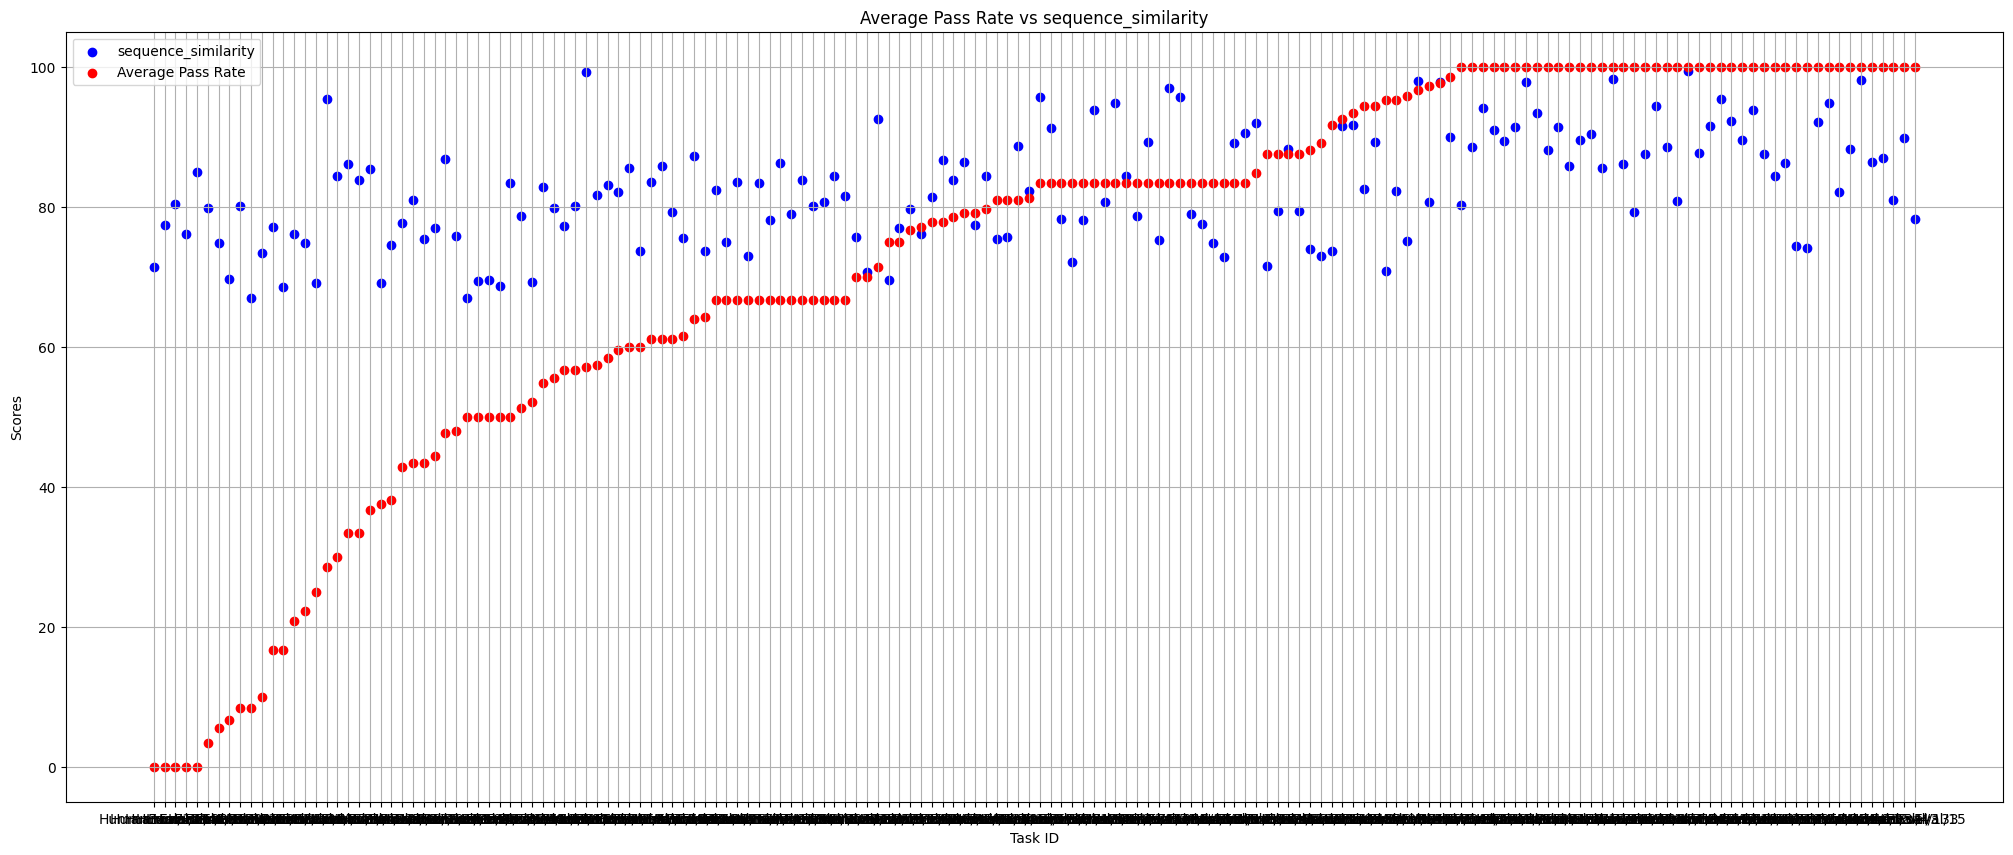

The correlation between the average pass rate and edit_distance_score is 0.42556308196512554


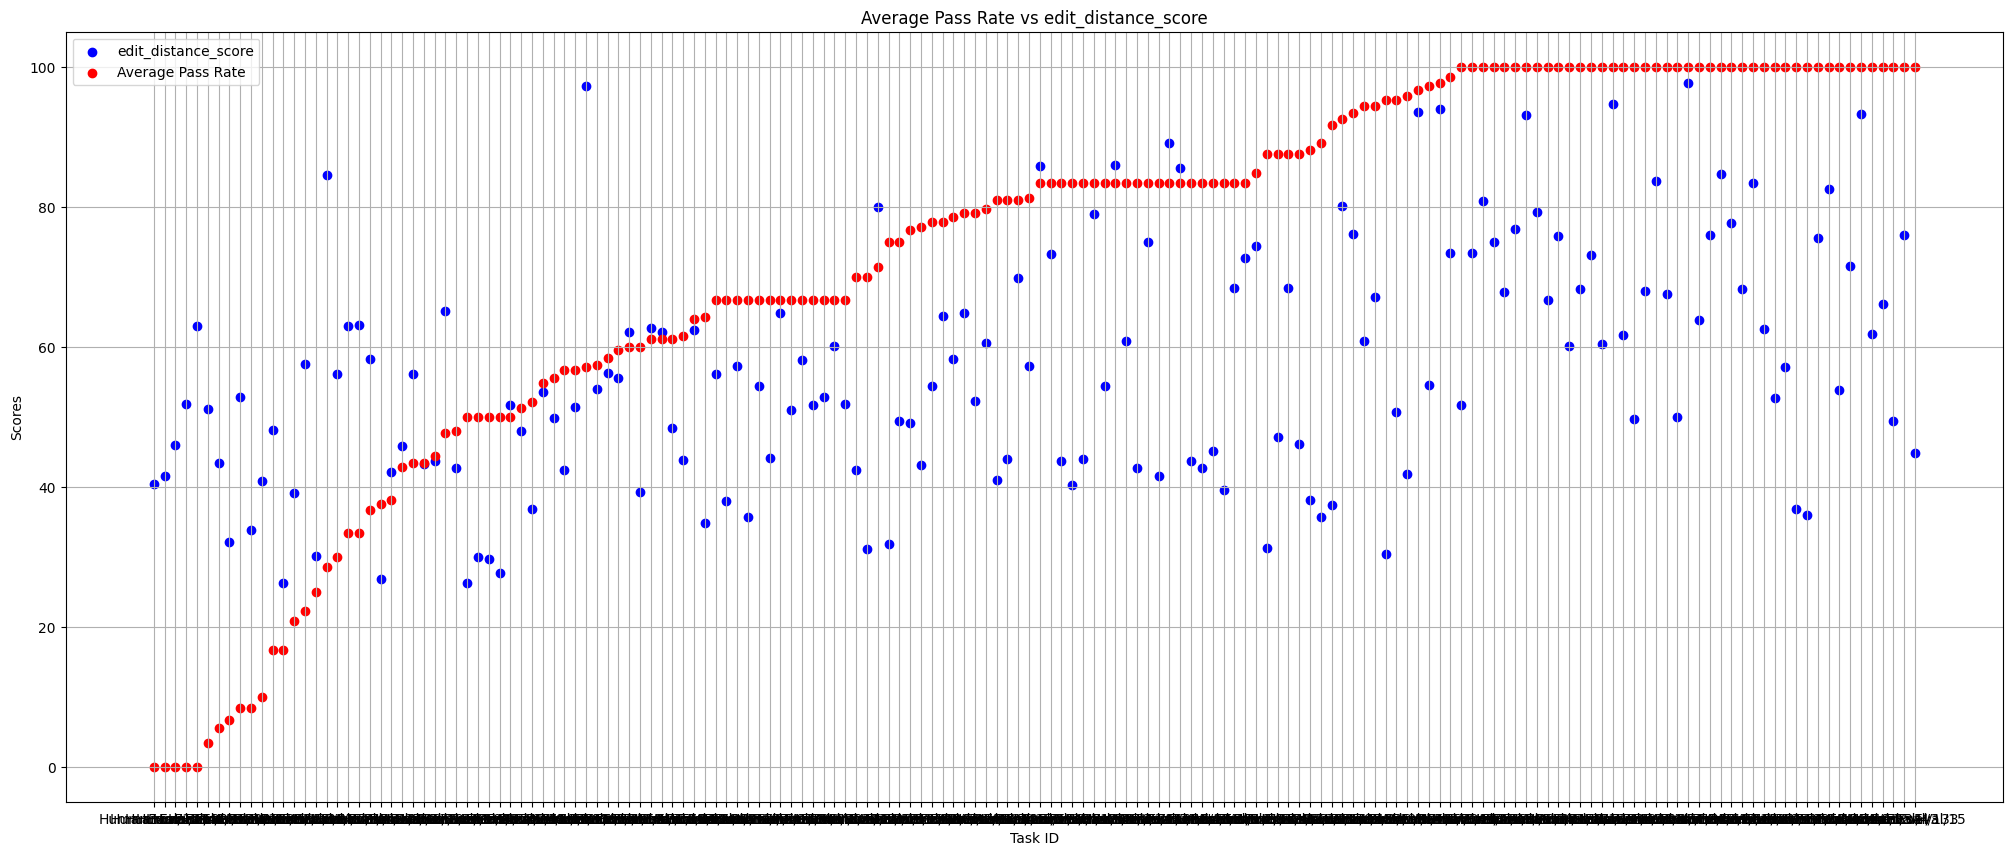

The correlation between the average pass rate and jaccard_similarity is 0.4017623155712994


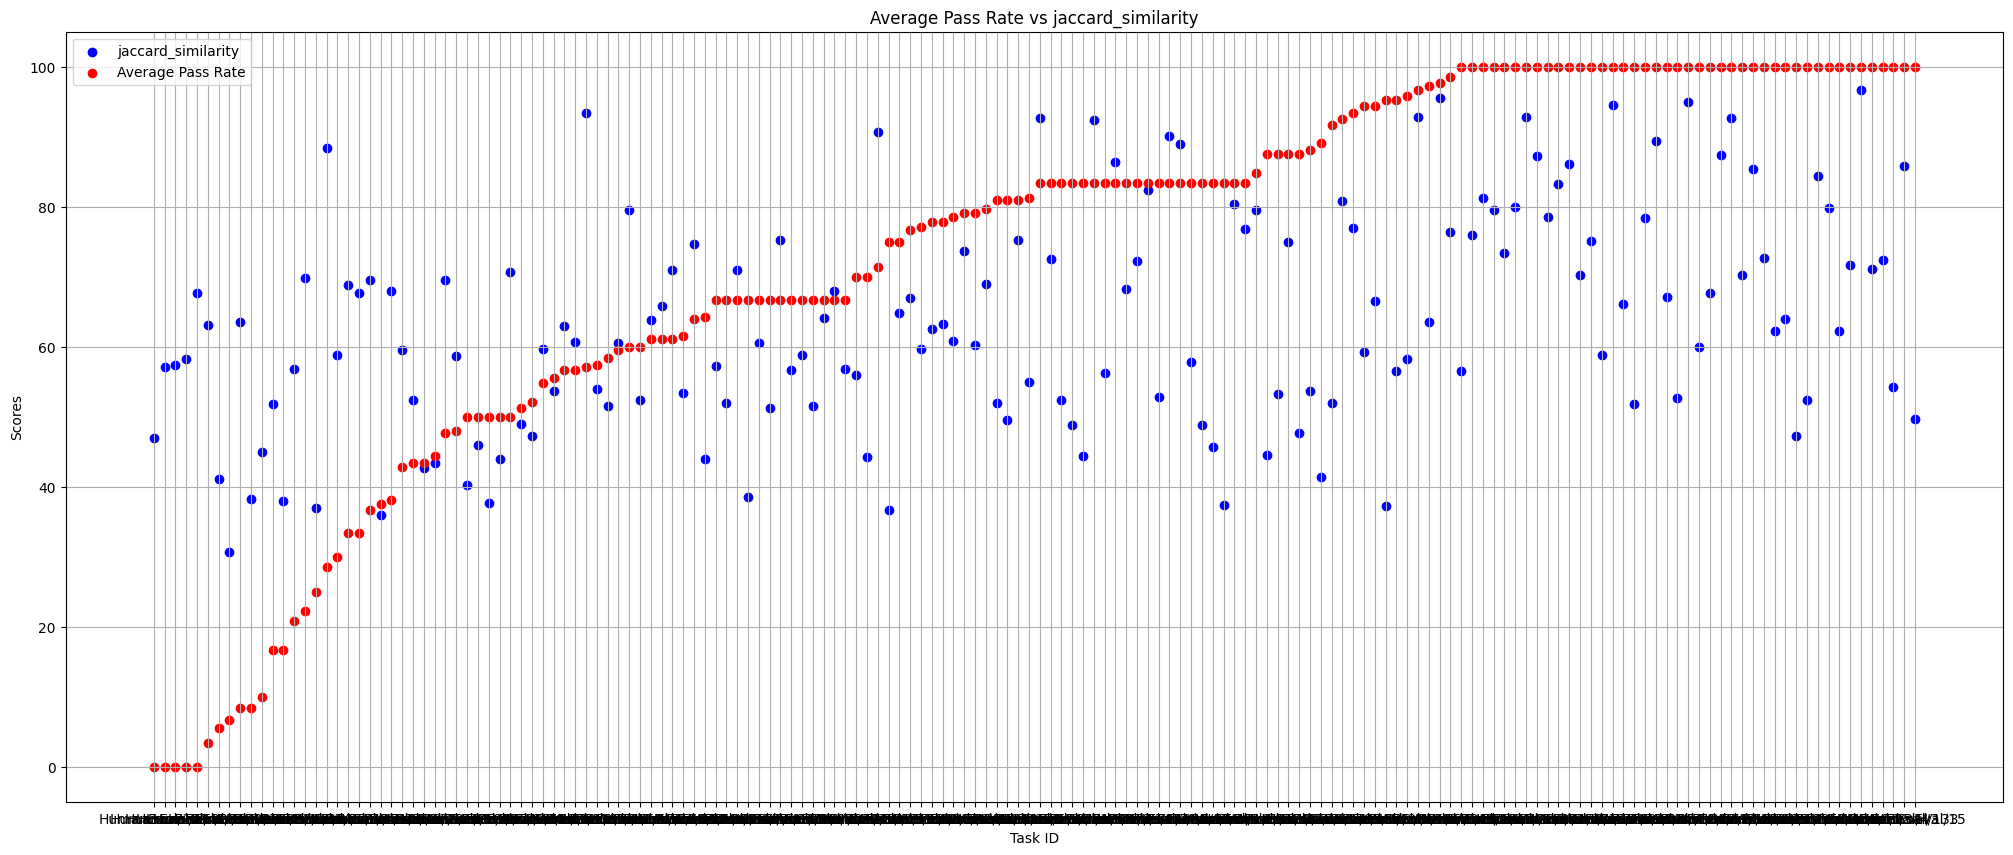

The correlation between the average pass rate and cosine_similarity_score is 0.4323860561239098


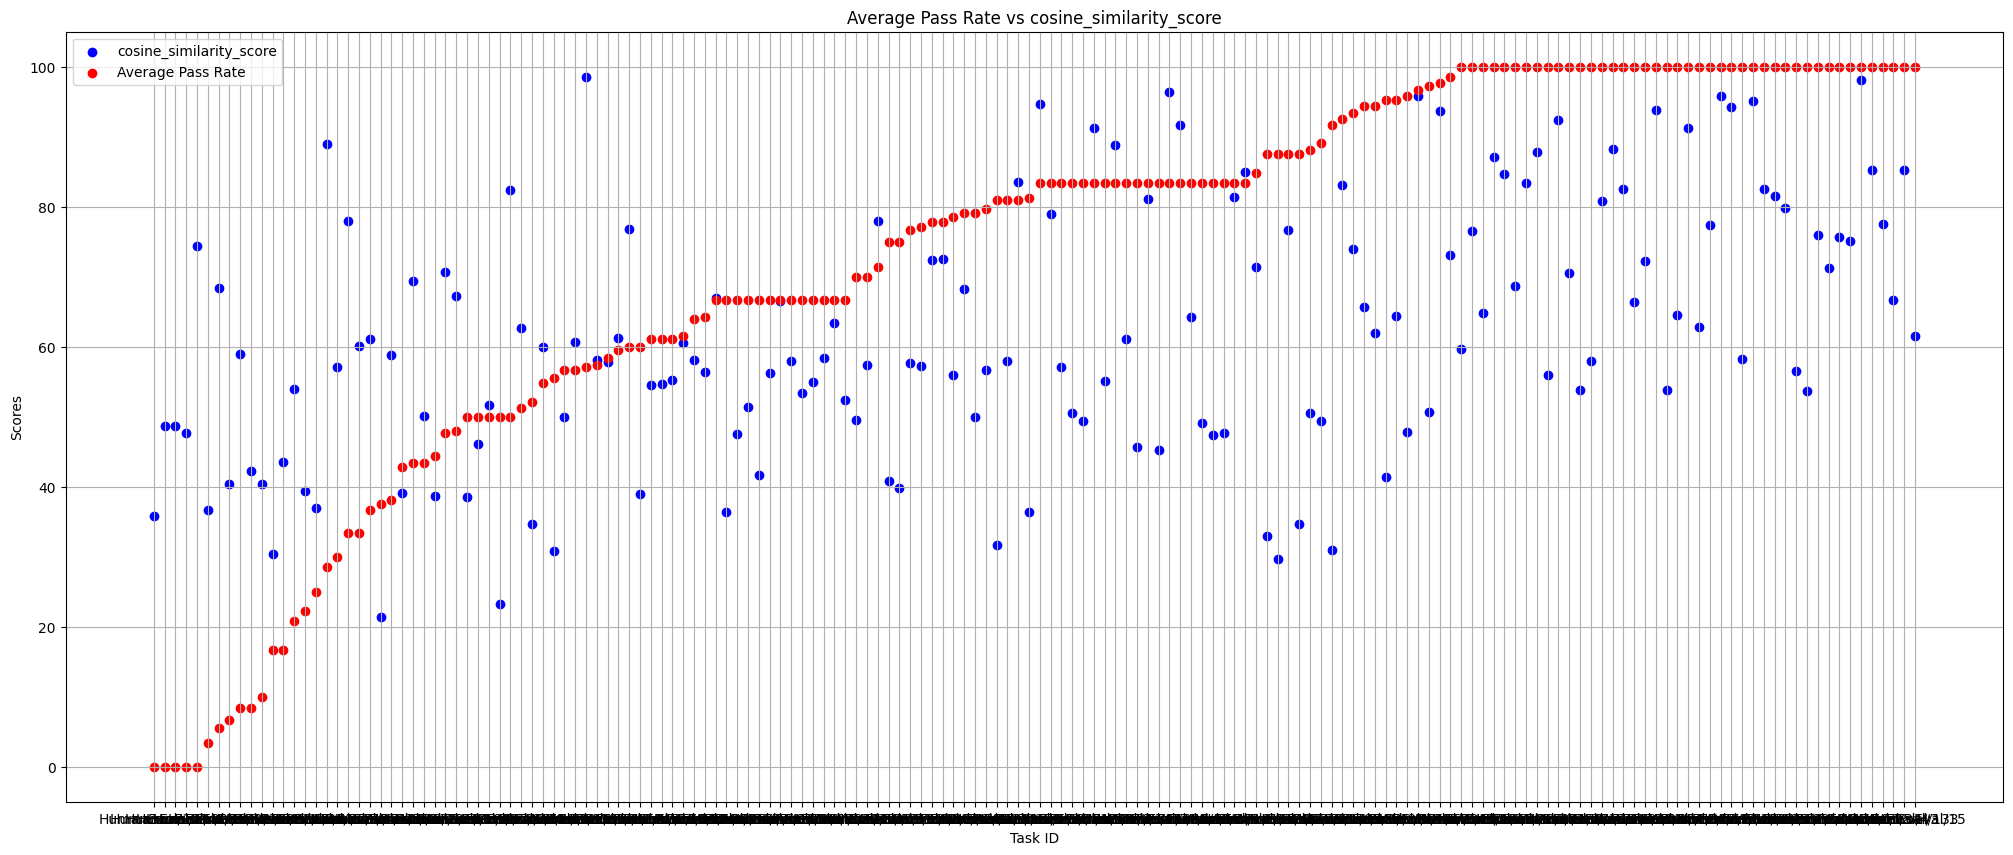

The correlation between the average pass rate and sorensen_dice_coefficient is 0.253695726228974


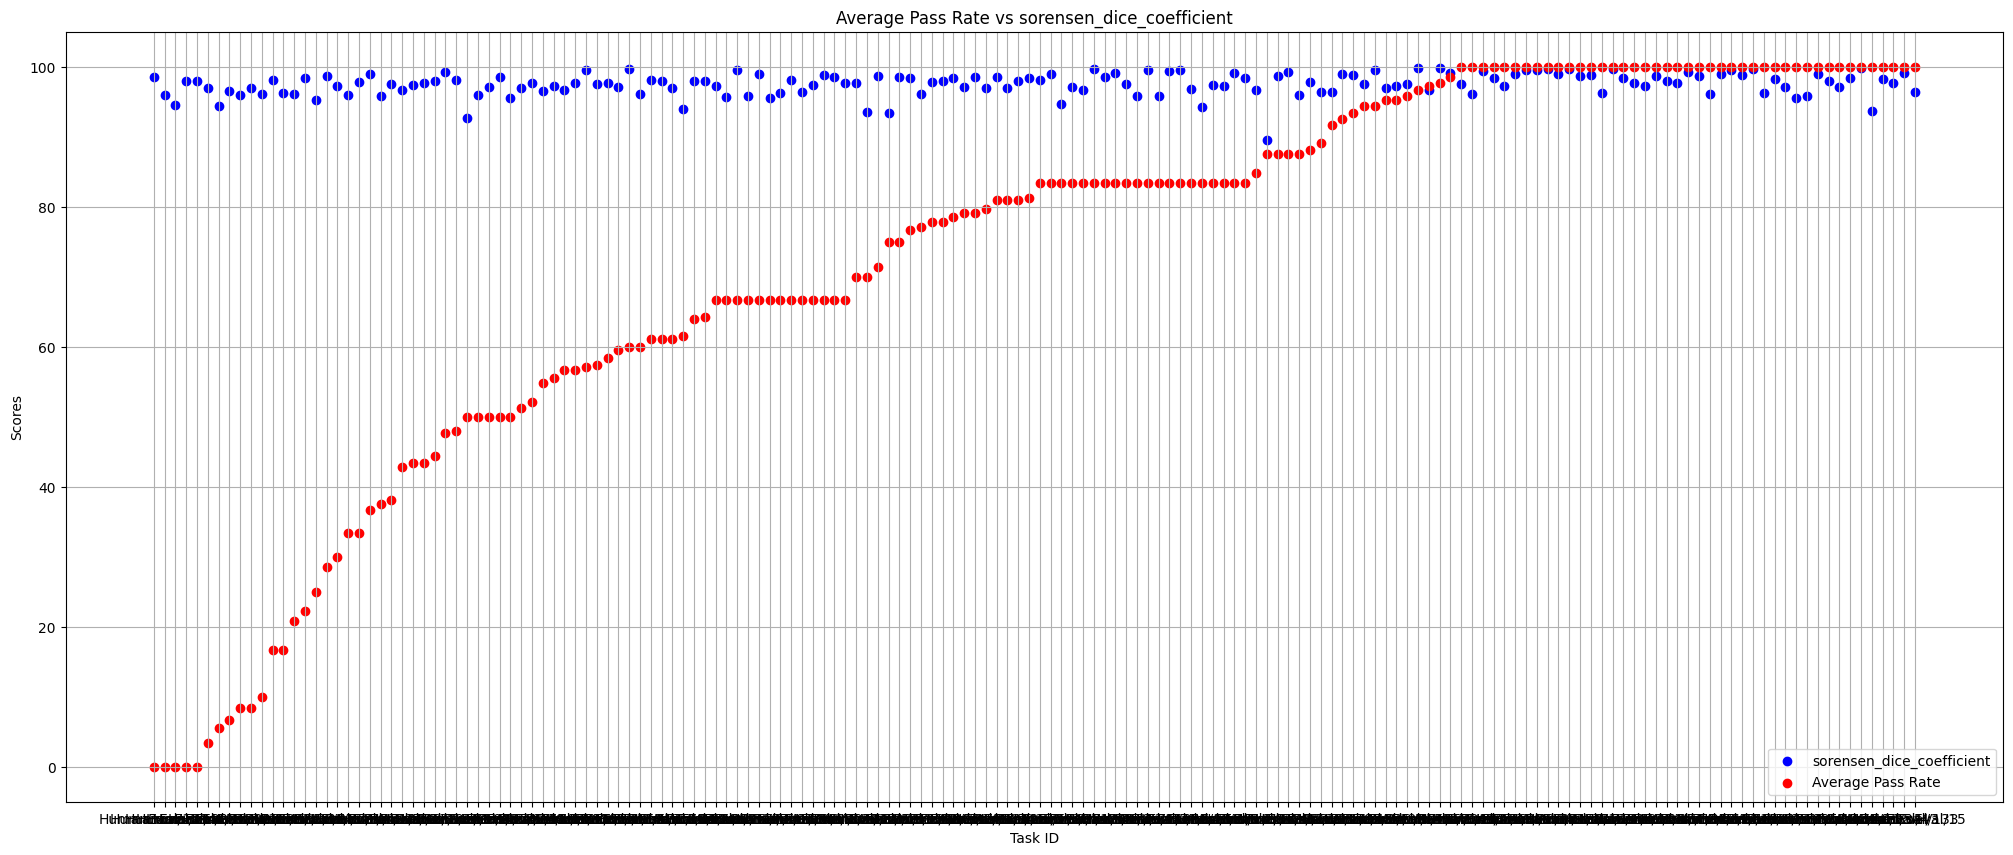

The correlation between the average pass rate and hamming_distance_score is 0.3001586874826234


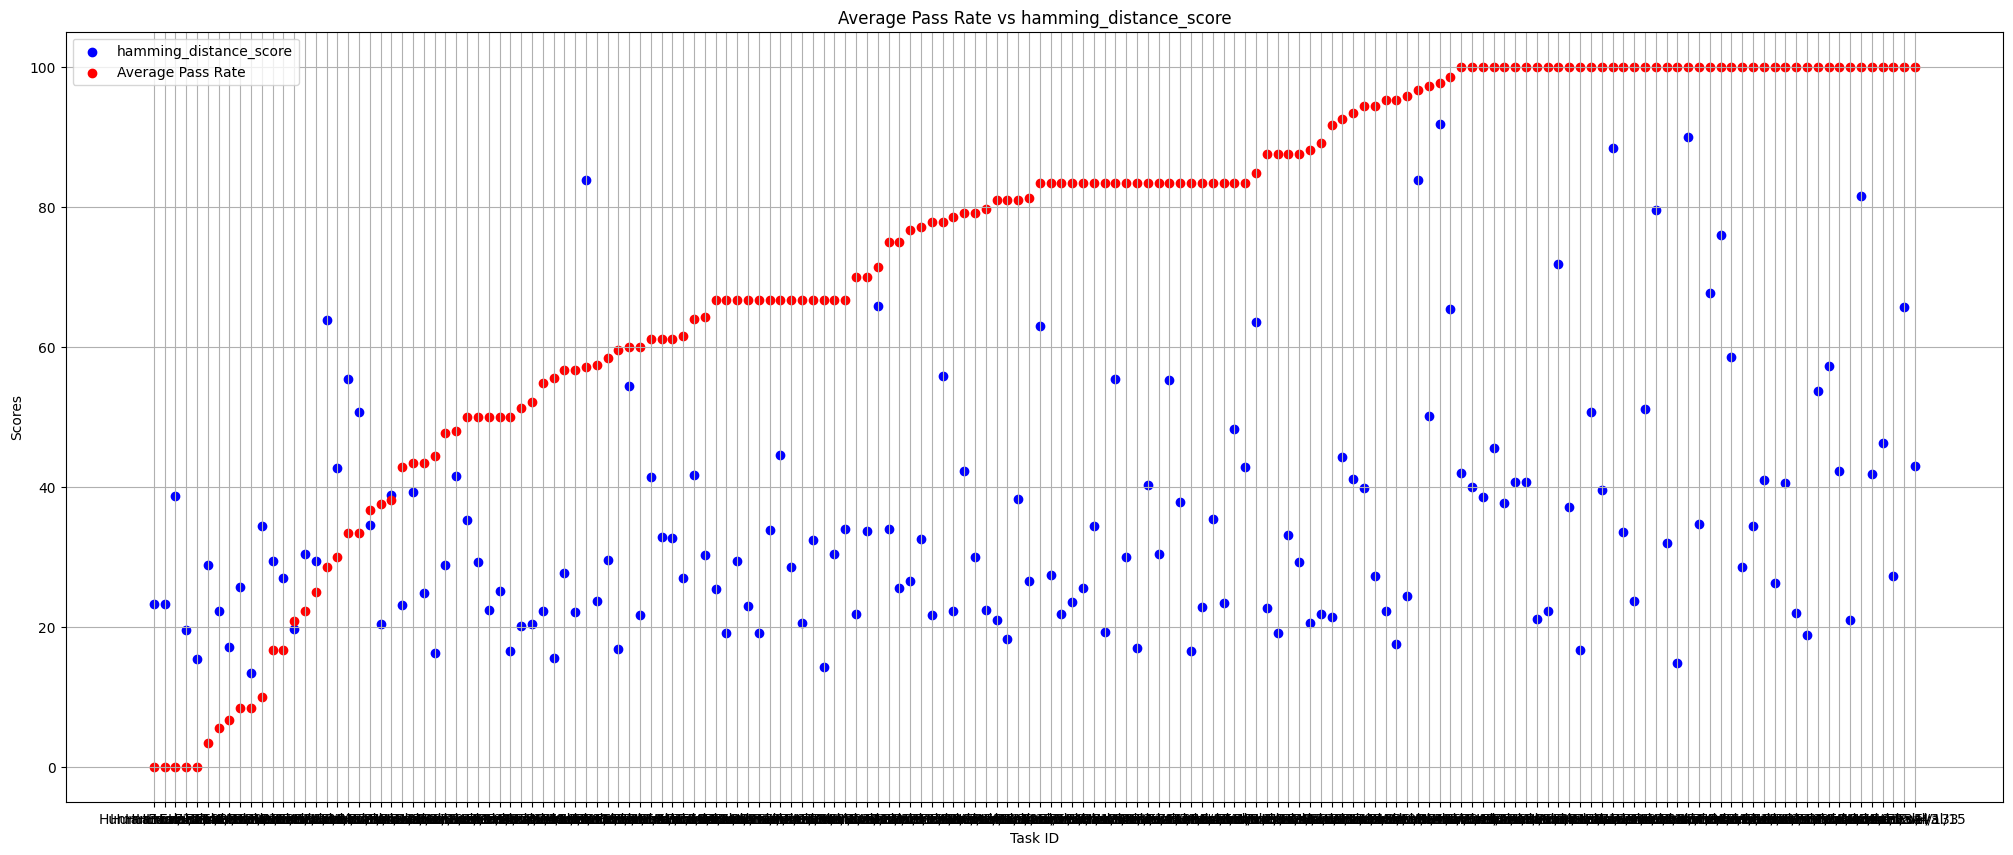

The correlation between the average pass rate and longest_common_subsequence is 0.3499578469077833


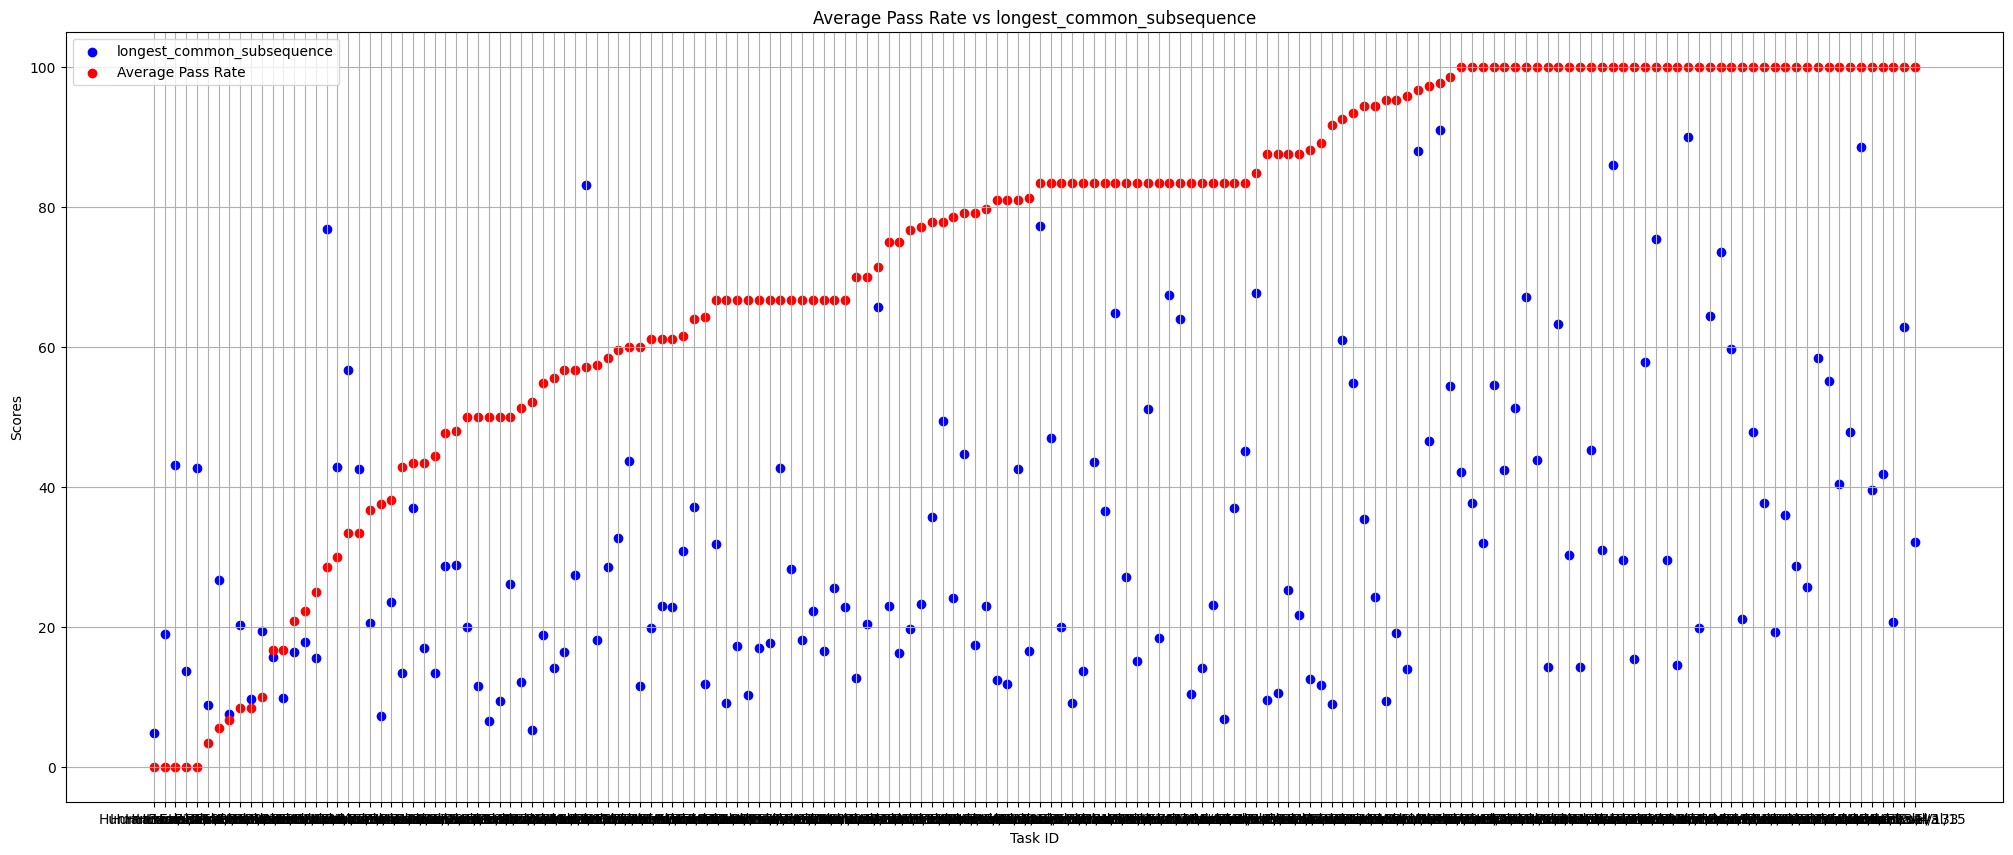

The correlation between the average pass rate and UnifiedDiff is 0.4178569734157659


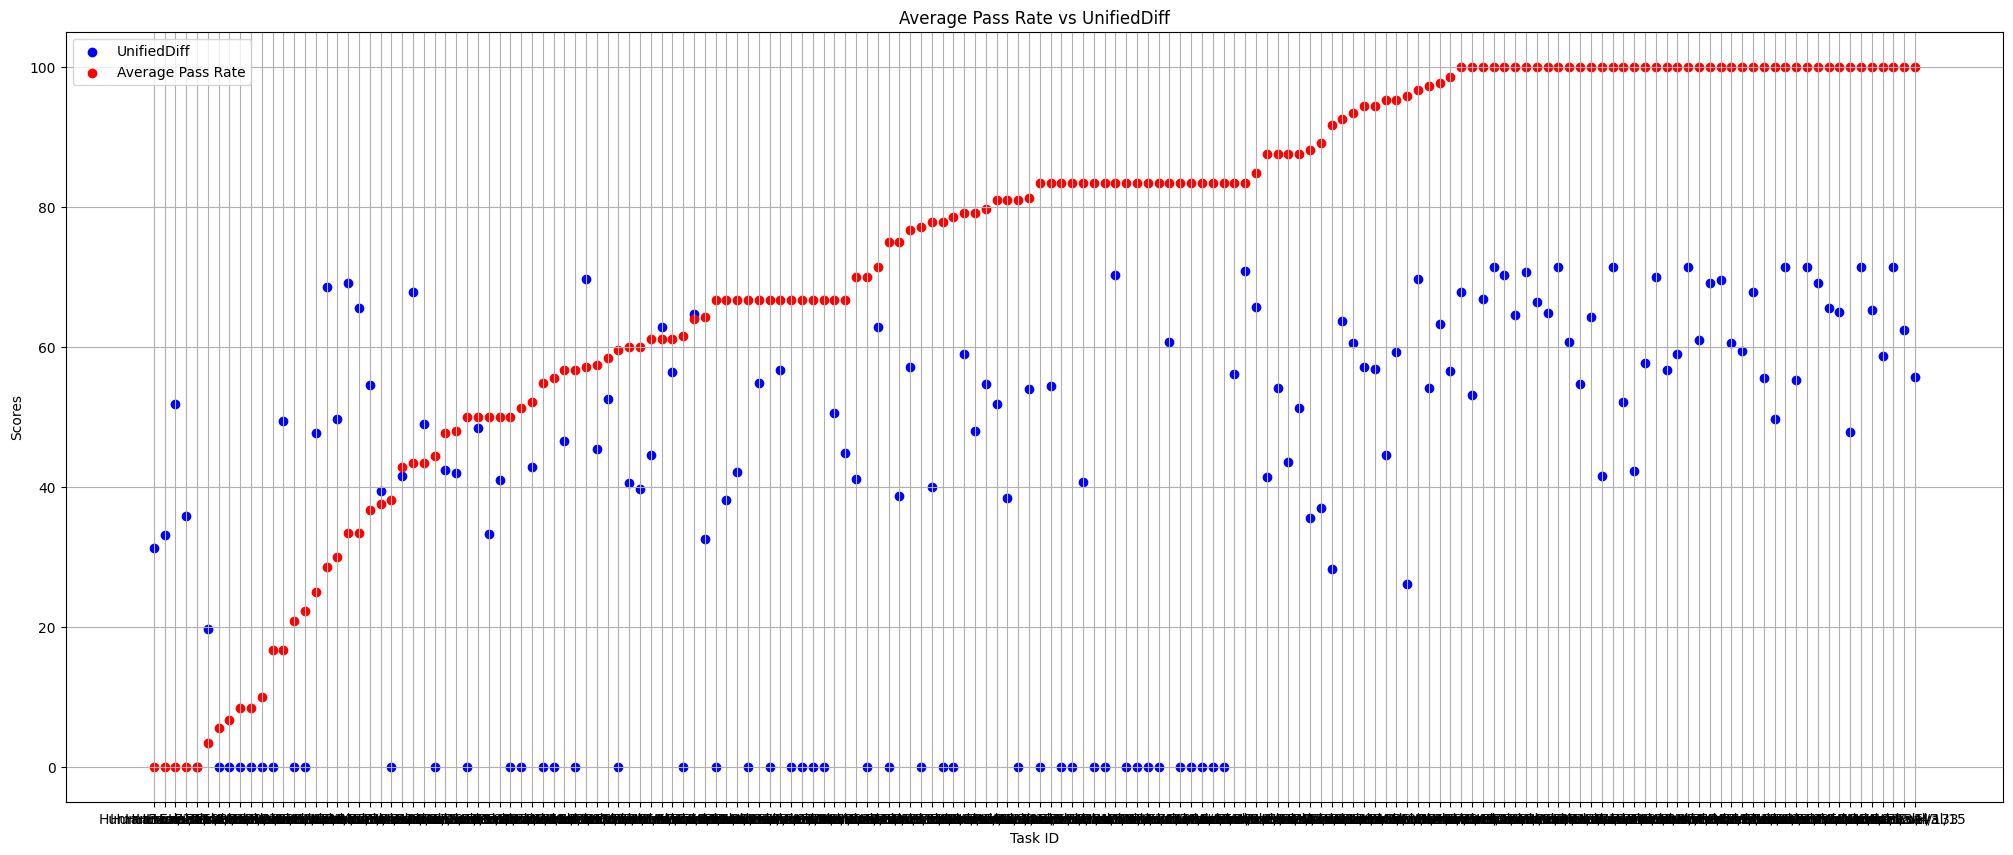

The correlation between the average pass rate and TreeDiff is 0.36679555680389464


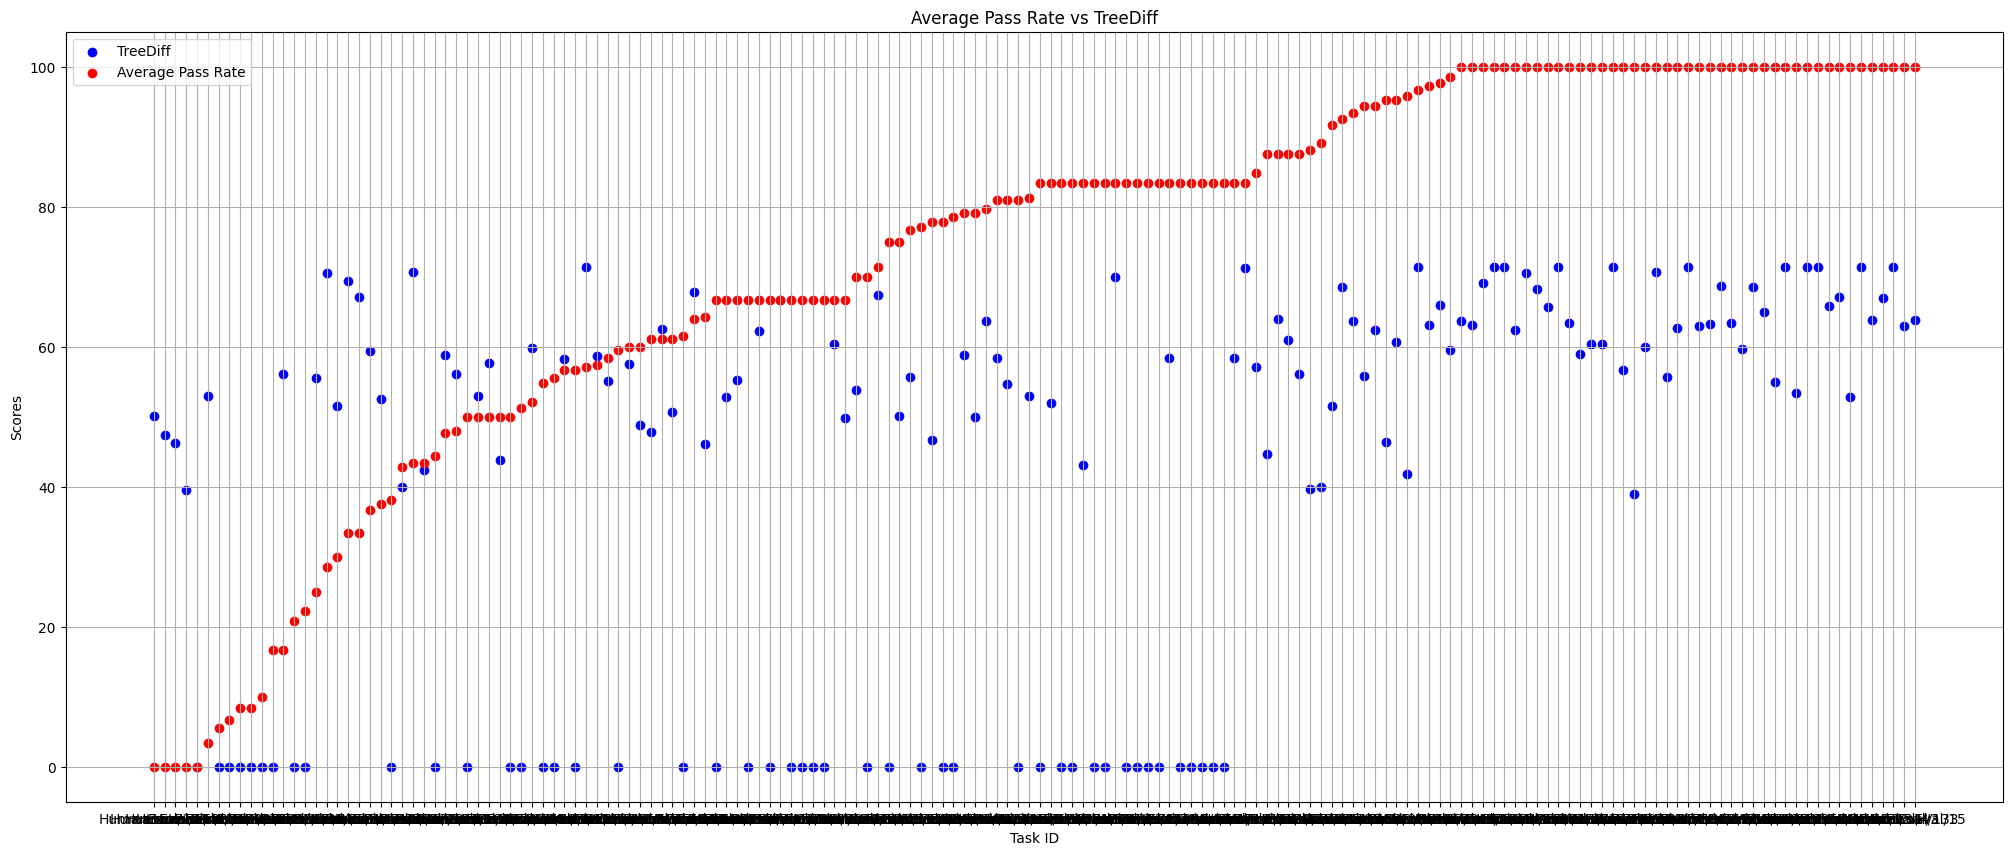

In [68]:
for score in scores_columns:
    print("The correlation between the average pass rate and",score,"is",df['avg_pass_rate'].corr(df[score]))
    #plot the avg pass rate wih color red and sequence similarity with color blue
    plt.figure(figsize=(25,10))
    plt.scatter(df['task_id'],df[score]*100,color='blue')
    plt.scatter(df['task_id'],df['avg_pass_rate'],color='red')
    plt.xlabel('Task ID')
    plt.ylabel('Scores')
    plt.legend([score,'Average Pass Rate'])
    plt.title('Average Pass Rate vs ' + score)
    plt.grid()
    plt.show()


In [31]:
# Prepare data for visualization
labels = list(syntactic_similarity_scores.keys())

# Create a grouped bar chart for syntactic and structural scores
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [syntactic_similarity_scores[label]['aggregate_score'] for label in labels], width, label='Syntactic')
rects2 = ax.bar(x + width/2, [structural_similarity_scores[label]['aggregate_score'] for label in labels], width, label='Structural')

ax.set_xlabel('Code')
ax.set_ylabel('Score')
ax.set_title('Syntactic and Structural Similarity Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

NameError: name 'syntactic_similarity_scores' is not defined

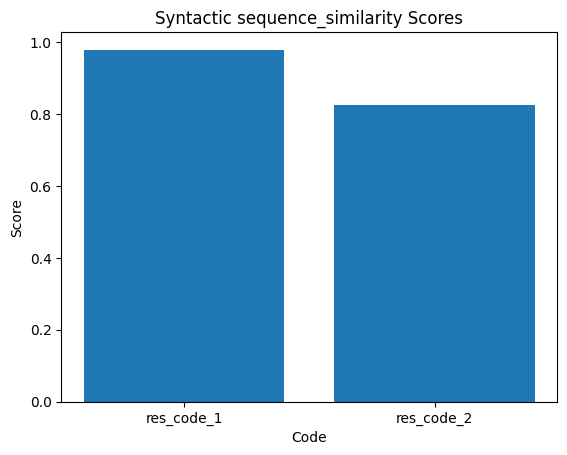

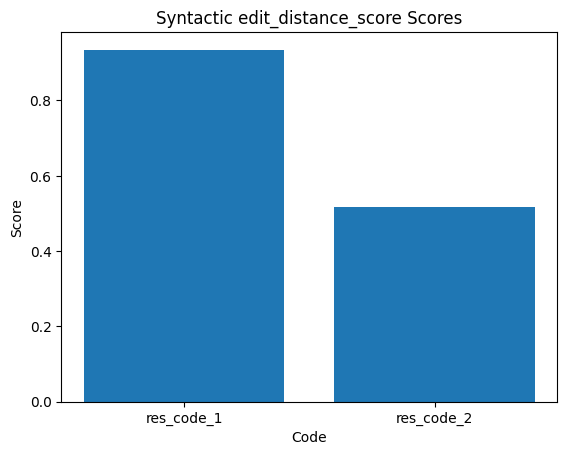

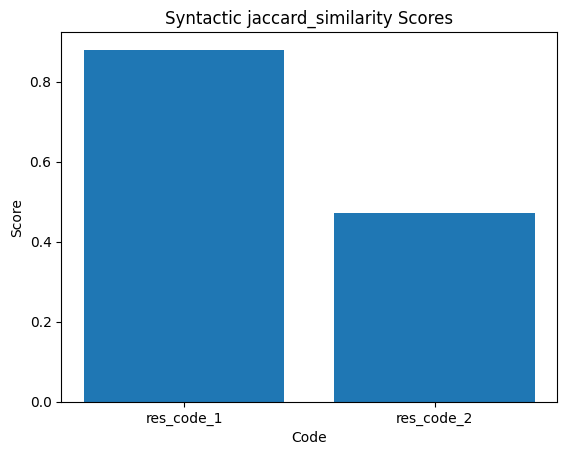

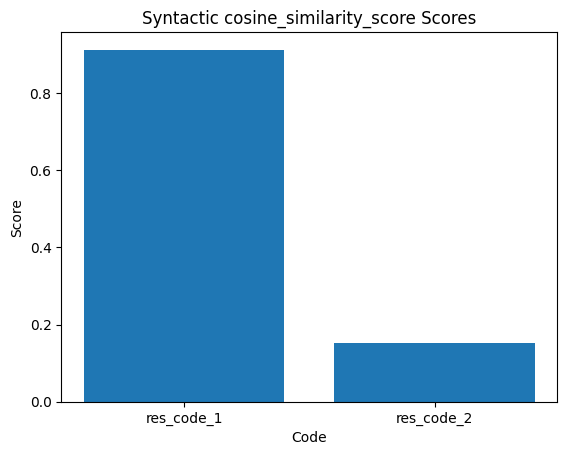

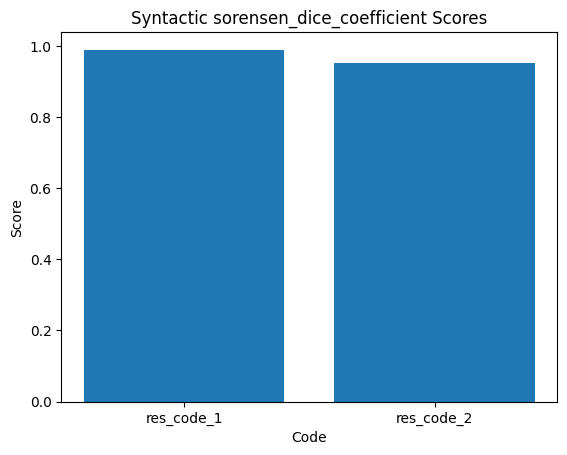

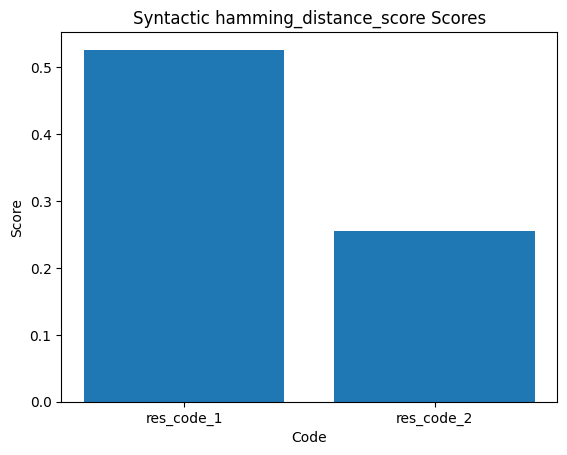

In [10]:
syntactic_metrics = list(syntactic_similarity_scores[labels[0]]['metrics'].keys())

# For each metric in syntactic metrics, create a separate bar chart
for metric in syntactic_metrics:
    plt.bar(labels, [syntactic_similarity_scores[label]['metrics'].get(metric, 0) for label in labels])
    plt.xlabel('Code')
    plt.ylabel('Score')
    plt.title(f'Syntactic {metric} Scores')
    plt.show()

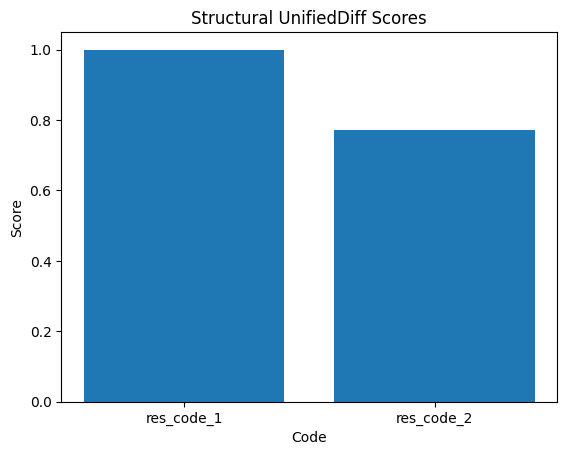

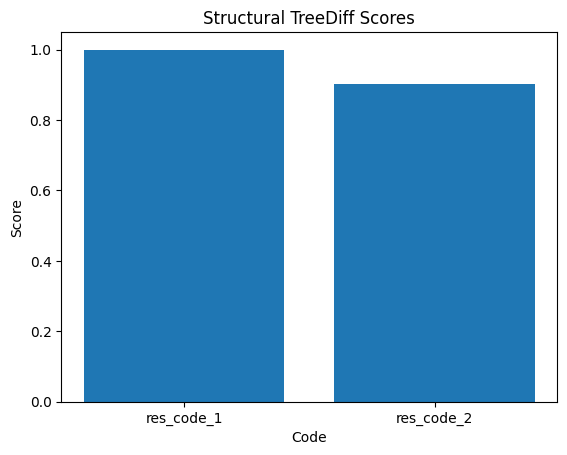

In [11]:
structural_metrics = list(structural_similarity_scores[labels[0]]['metrics'].keys())

# For each metric in structural metrics, create a separate bar chart
for metric in structural_metrics:
    plt.bar(labels, [structural_similarity_scores[label]['metrics'].get(metric, 0) for label in labels])
    plt.xlabel('Code')
    plt.ylabel('Score')
    plt.title(f'Structural {metric} Scores')
    plt.show()